## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import chi2_contingency

color_map = {
    "date":                    "black",
    "Indicateur_moyen_Brut_1": "tab:blue",
    "Indicateur_moyen_Brut_2": "tab:orange",
    "Indicateur_moyen_Brut_3": "tab:green",
    "Indicateur_moyen_Brut_4": "tab:red",
    "Indicateur_moyen_Brut_5": "tab:purple",
    "Indicateur_moyen_Brut_6": "tab:brown",
    "Indicateur_Moyen_1_5":    "tab:pink",
    "Indicateur_Moyen_1_6":    "tab:gray",
    "PIB":                     "tab:olive",
    "IPL":                     "tab:cyan",
    "TCH":                     "black",
    "Inflation":               "gold",
    "PIB_diff1":               "navy",
    "IPL_diff1":               "teal",
    "TCH_diff1":               "maroon",
    "Inflation_diff1":         "lime"
}
ccf_et_macro = pd.read_excel(r"C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Risque de credit\CREDIT_RISK_PROJECTION_CCF\data\ccf_et_macro.xlsx").iloc[:,1:]

In [23]:
segment = pd.read_csv(r"C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Risque de credit\CREDIT_RISK_PROJECTION_CCF\data\Données_CCF_PAR_SEGMENT.csv",sep=";")
segment.head()

,cod_prd_ref,note_ref,Indicateur_moyen_Brut,PourcNote,PourcNoteCohorte,PourcNoteCohorte5
0,2009T1,1,"0,451962798","0,0128162511542013","0,0677866770853682","0,115244104948522"
1,2009T1,2,"0,9185154","0,0150016761649346","0,13987106856808","0,237794752573896"
2,2009T1,3,"0,919842763","0,0188878742730812","0,0767728071889041","0,130521421454666"
3,2009T1,4,"1,275863582","0,0148540805032912","0,0498144168782965","0,0846894719362338"
4,2009T1,5,"1,093202854","0,0221397186552676","0,2539558507521","0,431750249086682"


In [61]:
macro = pd.read_excel(r"C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Risque de credit\CREDIT_RISK_PROJECTION_CCF\data\historique_macro_variables_projet_CCF_FowardLooking_IFRS9.xlsx")
macro["date_dernier_mois"] = pd.to_datetime(macro["date_dernier_mois"], format="%Y-%m")
macro["cod_prd_ref"] = macro["date_dernier_mois"].dt.year.astype(str) + "T" + macro["date_dernier_mois"].dt.quarter.astype(str)
macro.drop(columns=["date_dernier_mois"], inplace=True)
macro = macro[macro["cod_prd_ref"] >= '2009T1']


In [62]:
macro.head()

,PIB,IPL,TCH,Inflation,PIB_diff1,IPL_diff1,TCH_diff1,Inflation_diff1,cod_prd_ref
116,-1.286788,-1.624415,8.3,0.301692,-1.430885,-2.593841,0.9,-0.697982,2009T1
117,-2.243102,-4.278729,8.8,-0.489570,-0.956314,-2.654313,0.5,-0.791262,2009T2
118,-3.012266,-6.103516,8.8,-0.362976,-0.769164,-1.824787,0.0,0.126594,2009T3
119,-2.782833,-6.105367,9.2,0.914470,0.229433,-0.001851,0.4,1.277447,2009T4
120,-1.517665,-4.278209,9.0,1.589859,1.265167,1.827158,-0.2,0.675389,2010T1


### Merge des series

In [63]:
segment["cod_prd_ref"] = segment["cod_prd_ref"].astype(str).str.strip()
macro["cod_prd_ref"] = macro["cod_prd_ref"].astype(str).str.strip()

In [64]:
df_merged = pd.merge(segment, macro, on="cod_prd_ref", how="left")

In [65]:
df_merged.head()

,cod_prd_ref,note_ref,Indicateur_moyen_Brut,PourcNote,PourcNoteCohorte,PourcNoteCohorte5,PIB,IPL,TCH,Inflation,PIB_diff1,IPL_diff1,TCH_diff1,Inflation_diff1
0,2009T1,1,"0,451962798","0,0128162511542013","0,0677866770853682","0,115244104948522",-1.286788,-1.624415,8.3,0.301692,-1.430885,-2.593841,0.9,-0.697982
1,2009T1,2,"0,9185154","0,0150016761649346","0,13987106856808","0,237794752573896",-1.286788,-1.624415,8.3,0.301692,-1.430885,-2.593841,0.9,-0.697982
2,2009T1,3,"0,919842763","0,0188878742730812","0,0767728071889041","0,130521421454666",-1.286788,-1.624415,8.3,0.301692,-1.430885,-2.593841,0.9,-0.697982
3,2009T1,4,"1,275863582","0,0148540805032912","0,0498144168782965","0,0846894719362338",-1.286788,-1.624415,8.3,0.301692,-1.430885,-2.593841,0.9,-0.697982
4,2009T1,5,"1,093202854","0,0221397186552676","0,2539558507521","0,431750249086682",-1.286788,-1.624415,8.3,0.301692,-1.430885,-2.593841,0.9,-0.697982


In [66]:
colonnes_virgule = ['Indicateur_moyen_Brut', 'PourcNote', 'PourcNoteCohorte', 'PourcNoteCohorte5']
for col in colonnes_virgule:
    df_merged[col] = df_merged[col].str.replace(",", ".").astype(float)


segment 2

In [71]:
df_seg2 = df_merged[df_merged["note_ref"] == 2].copy()
df_seg2["Indicateur_moyen_Brut"] = df_seg2["Indicateur_moyen_Brut"].astype(str).str.replace(",", ".").astype(float)


In [72]:
variables_macro = ["PIB", "TCH", "Inflation"]


In [85]:
import itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def test_cointégration_segment(df, segment_num, macro_vars=["PIB", "TCH", "Inflation"]):
    """
    Teste toutes les combinaisons de cointégration entre Indicateur_moyen_Brut et les variables macro pour un segment donné.
    Utilise le test de Johansen.
    """
    print(f"\n{'='*60}")
    print(f"🔎 Test de cointégration – Segment {segment_num}")
    print(f"{'='*60}")

    df_seg = df[df["note_ref"] == segment_num].copy()
    df_seg["Indicateur_moyen_Brut"] = df_seg["Indicateur_moyen_Brut"].astype(str).str.replace(",", ".").astype(float)

    # Tester toutes les combinaisons de variables macro (de taille 1 à len(macro_vars))
    for r in range(1, len(macro_vars) + 1):
        for comb in itertools.combinations(macro_vars, r):
            vars_comb = ["Indicateur_moyen_Brut"] + list(comb)
            df_test = df_seg[vars_comb].dropna()

            # Vérifier que suffisamment de données
            if df_test.shape[0] < 10:
                print(f"⏩ Pas assez d'observations pour {vars_comb}")
                continue

            try:
                jres = coint_johansen(df_test, det_order=0, k_ar_diff=1)
                print(f"\n📊 Test Johansen – Variables: {vars_comb}")
                for i, trace in enumerate(jres.lr1):
                    stat = trace
                    crit = jres.cvt[i, 1]  # seuil à 95%
                    conclusion = "✅ Cointégration" if stat > crit else "❌ Pas de cointégration"
                    print(f" - H0: ≤ {i} vecteurs — Trace Stat = {stat:.2f} vs Crit 95% = {crit:.2f} → {conclusion}")
            except Exception as e:
                print(f"⚠️ Erreur sur combinaison {vars_comb} : {e}")


In [86]:
test_cointégration_segment(df_merged, segment_num=2)



🔎 Test de cointégration – Segment 2

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'PIB']
 - H0: ≤ 0 vecteurs — Trace Stat = 24.98 vs Crit 95% = 15.49 → ✅ Cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 3.45 vs Crit 95% = 3.84 → ❌ Pas de cointégration

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'TCH']
 - H0: ≤ 0 vecteurs — Trace Stat = 10.68 vs Crit 95% = 15.49 → ❌ Pas de cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 1.02 vs Crit 95% = 3.84 → ❌ Pas de cointégration

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'Inflation']
 - H0: ≤ 0 vecteurs — Trace Stat = 9.12 vs Crit 95% = 15.49 → ❌ Pas de cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 3.35 vs Crit 95% = 3.84 → ❌ Pas de cointégration

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'PIB', 'TCH']
 - H0: ≤ 0 vecteurs — Trace Stat = 33.96 vs Crit 95% = 29.80 → ✅ Cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 11.80 vs Crit 95% = 15.49 → ❌ Pas de cointégration
 - H0: ≤ 2 vecteurs — Trace Sta

In [87]:
test_cointégration_segment(df_merged, segment_num=3)


🔎 Test de cointégration – Segment 3

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'PIB']
 - H0: ≤ 0 vecteurs — Trace Stat = 26.15 vs Crit 95% = 15.49 → ✅ Cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 8.29 vs Crit 95% = 3.84 → ✅ Cointégration

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'TCH']
 - H0: ≤ 0 vecteurs — Trace Stat = 16.13 vs Crit 95% = 15.49 → ✅ Cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 0.32 vs Crit 95% = 3.84 → ❌ Pas de cointégration

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'Inflation']
 - H0: ≤ 0 vecteurs — Trace Stat = 14.29 vs Crit 95% = 15.49 → ❌ Pas de cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 4.61 vs Crit 95% = 3.84 → ✅ Cointégration

📊 Test Johansen – Variables: ['Indicateur_moyen_Brut', 'PIB', 'TCH']
 - H0: ≤ 0 vecteurs — Trace Stat = 36.00 vs Crit 95% = 29.80 → ✅ Cointégration
 - H0: ≤ 1 vecteurs — Trace Stat = 17.09 vs Crit 95% = 15.49 → ✅ Cointégration
 - H0: ≤ 2 vecteurs — Trace Stat = 0.37 vs Crit 95% = 3.84

🧠 Recommandations de modélisation

Modéliser avec un VECM (Vector Error Correction Model) pour :

Segment 2 → avec les variables ["Indicateur_moyen_Brut", "PIB"]

Segment 3 → avec ["Indicateur_moyen_Brut", "PIB", "TCH"]

Objectif final : Prévoir Indicateur_moyen_Brut à 3 ans à l’aide des projections macroéconomiques (PIB, TCH, etc.)

## Deux approches

### VECM pur

In [104]:
from statsmodels.tsa.vector_ar.vecm import VECM
import pandas as pd
import matplotlib.pyplot as plt

def train_vecm_and_forecast(df, segment_name="CCF2", macro_vars=["PIB"], n_forecast=3):
    """
    Entraîne un VECM sur la série segmentée et projette à n années.
    """
    # Subset des colonnes nécessaires
    all_vars = [segment_name] + macro_vars
    df_model = df[all_vars].dropna().copy()

    # Index temporel
    df_model.index = pd.date_range(start="2008", periods=len(df_model), freq="Y")

    # Entraînement du VECM
    vecm = VECM(df_model, k_ar_diff=1, coint_rank=1, deterministic="co")
    vecm_fit = vecm.fit()

    # Projection
    forecast = vecm_fit.predict(steps=n_forecast)

    # Création d’un DataFrame avec les prédictions
    df_forecast = pd.DataFrame(forecast, 
                               index=pd.date_range(start=df_model.index[-1] + pd.offsets.YearEnd(1), periods=n_forecast, freq="Y"),
                               columns=all_vars)
    df_all = pd.concat([df_model, df_forecast])

    # Affichage
    plt.figure(figsize=(10, 5))
    plt.plot(df_all[segment_name], label=f"{segment_name} (observé + prédit)")
    plt.axvline(df_model.index[-1], color='gray', linestyle='--', label="Début prévision")
    plt.legend()
    plt.title(f"Prévision VECM – {segment_name}")
    plt.grid(True)
    plt.show()

    return df_forecast, vecm_fit


C:\Users\chemm\AppData\Local\Temp\ipykernel_2752\357471448.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_model.index = pd.date_range(start="2008", periods=len(df_model), freq="Y")
C:\Users\chemm\AppData\Local\Temp\ipykernel_2752\357471448.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index=pd.date_range(start=df_model.index[-1] + pd.offsets.YearEnd(1), periods=n_forecast, freq="Y"),


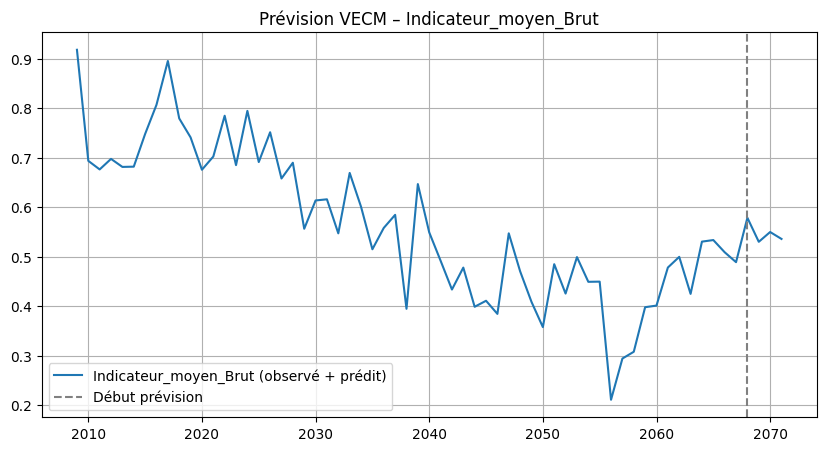

In [105]:
df_2 = df_merged[df_merged["note_ref"] == 2].copy()
df_forecast2, vecm_model2 = train_vecm_and_forecast(df_2, segment_name="Indicateur_moyen_Brut", macro_vars=["PIB"], n_forecast=3)


C:\Users\chemm\AppData\Local\Temp\ipykernel_2752\357471448.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_model.index = pd.date_range(start="2008", periods=len(df_model), freq="Y")
C:\Users\chemm\AppData\Local\Temp\ipykernel_2752\357471448.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index=pd.date_range(start=df_model.index[-1] + pd.offsets.YearEnd(1), periods=n_forecast, freq="Y"),


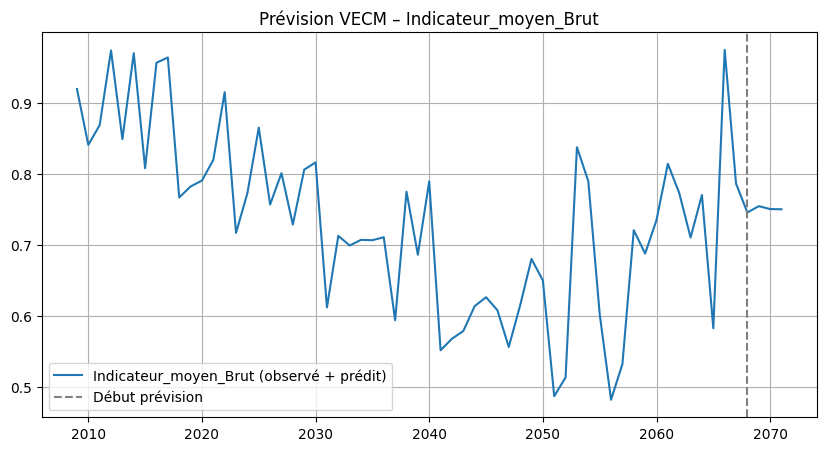

In [106]:
df_3 = df_merged[df_merged["note_ref"] == 3].copy()

df_forecast3, vecm_model3 = train_vecm_and_forecast(df_3, segment_name="Indicateur_moyen_Brut", macro_vars=["PIB", "TCH"], n_forecast=3)


### Régression économique à partir de la cointégration

In [92]:
print(df_vecm.columns.tolist())


['CCF2', 'CCF3', 'PIB']


In [95]:
import statsmodels.api as sm

def regression_cointégration(df_vecm, target_col, expl_col):
    """
    Estime une régression d'équilibre cointegrante entre une cible et une variable explicative.
    """
    X = sm.add_constant(df_vecm[expl_col])
    y = df_vecm[target_col]

    model = sm.OLS(y, X).fit()
    print(model.summary())

    # Résidu de cointégration
    df_vecm["resid_equilibre"] = y - model.predict(X)

    return model, df_vecm
model_eq, df_with_resid = regression_cointégration(df_vecm, target_col="CCF2", expl_col="PIB")


                            OLS Regression Results                            
Dep. Variable:                   CCF2   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.03275
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.857
Time:                        03:33:02   Log-Likelihood:                 28.364
No. Observations:                  60   AIC:                            -52.73
Df Residuals:                      58   BIC:                            -48.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5649      0.021     27.052      0.0